In [420]:
    import pandas as pd
    import numpy as np
    from scipy.special import softmax
    from tqdm import tqdm
    from transformers import AutoTokenizer, AutoModelForSequenceClassification,AutoModelForCausalLM


In [422]:
!pip install --upgrade tensorflow keras


In [425]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

C:\Users\Work\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [427]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation


In [441]:
import nltk

In [443]:
from nltk.corpus import stopwords

In [445]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Work\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [447]:
stopwords.words('arabic')

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'

In [449]:
print(stopwords.words('arabic'))

['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه', 'فيها', '

In [453]:
import re

In [576]:
def custom_split(text, delimiter=' '):
    result = []
    current_word = ''
    
    for char in text:
        if char == delimiter:
            result.append(current_word)
            current_word = ''
        else:
            current_word += char
    
    if current_word:
        result.append(current_word)
    
    return result


In [461]:
from nltk.corpus import stopwords


In [469]:
from nltk.stem import ISRIStemmer
LS= ISRIStemmer()

In [473]:
from sklearn.feature_extraction.text import CountVectorizer 

In [578]:

def cleanText(text):
     # Step 1: Replace specific characters
    # This regex keeps Arabic characters (Unicode range \u0621-\u064A) and spaces
    text = re.sub(r'[^\u0621-\u064A\s]', ' ', text)
    text = text.strip()
    words = custom_split(text)
    words = [word for word in words if word not in stopwords.words('arabic')]
    text = ' '.join(words)
    text = ' '.join([LS.stem(word) for word in text.split()])
    return text


In [549]:
# Load the Excel file summrized traiend data 
file_path = r'C:/Users/Work/OneDrive/Desktop/Summrize_training_data.xlsx'
summrization = pd.read_excel(file_path)
summrization.columns = ['S_ID', 'ConcatenatedResponse','الملخص']
summrization  

,S_ID,ConcatenatedResponse,الملخص
0,1,الذى اعجبنى والذى لم يعجبنى ومقتراحات تحسين...,لم يتم تقديم أي ملاحظات.
1,39,الذى اعجبنى والذى لم يعجبنى ومقتراحات تحسين...,لم يتم تقديم أي ملاحظات.
2,51,الذى اعجبنى كل شي والذى لم يعجبنى لا شي ومقتر...,أعجب الطالب بكل شيء، ولم يكن هناك ما لم يعجبه....
3,85,الذى اعجبنى والذى لم يعجبنى ومقتراحات تحسين...,لم يتم تقديم أي ملاحظات.
4,114,الذى اعجبنى والذى لم يعجبنى ومقتراحات تحسين...,لم يتم تقديم أي ملاحظات.
...,...,...,...
68,2255,الذى اعجبنى جيد مستوفي جدا للماده العلميه للد...,لم يتم تقديم أي ملاحظات.
69,2256,الذى اعجبنى والذى لم يعجبنى ومقتراحات تحسين...,أعجب الطالب بمحتوى الدورة، ولم يجد شيئًا لم يع...
70,2257,الذى اعجبنى شرح الدكتور المبسط والذى لم يعجبن...,لم يتم تقديم أي ملاحظات.
71,2258,الذى اعجبنى شرح الدكتور واسلوبه والذى لم يعجب...,أعجب الطالب بطريقة الشرح، لكنه لم يقدم أي اقتر...


In [580]:
summrization['ConcatenatedResponse'] = summrization['ConcatenatedResponse'].apply(cleanText)
summrization['الملخص'] = summrization['الملخص'].apply(cleanText)


In [582]:
summrization.shape


(73, 3)

In [584]:
# Define the function to count words
cnt = 0
total_rows = len(summrization['ConcatenatedResponse'])

for i in summrization['ConcatenatedResponse']:
    if len(custom_split(i)) <= 70:  # Check for texts with 0-70 words
        cnt += 1

# Print the percentage of texts having 0-70 words
print(cnt / total_rows)


1.0


In [586]:
# cheak how much % of ConcatenatedResponse have 0-20 words
cnt=0
for i in summrization['الملخص']:
    if len(i.split()) <=20:
        cnt=cnt+1
print(cnt/len(summrization['الملخص']))

1.0


In [588]:
#Model to summarize the text between 0-20 words for الملخص and 0-70 words for ConcatenatedResponse
max_ConcatenatedResponse_len=70 
max_الملخص_len=20 


In [590]:
# Select the Summaries and Text which fall below ,ax length 
from sklearn.model_selection import train_test_split

X_summary = summrization['ConcatenatedResponse']
y_summary = summrization['الملخص']

X_summary_train, X_summary_test, y_summary_train, y_summary_test = train_test_split(X_summary, y_summary, test_size=0.33, random_state=42)


In [592]:

# Display the shapes of the resulting dataframes
print(f"X_summary_train shape: {X_summary_train.shape}")
print(f"X_summary_test shape: {X_summary_test.shape}")
print(f"y_summary_train shape: {y_summary_train.shape}")
print(f"y_summary_test shape: {y_summary_test.shape}")


X_summary_train shape: (48,)
X_summary_test shape: (25,)
y_summary_train shape: (48,)
y_summary_test shape: (25,)


In [595]:

# Convert columns to numpy arrays and slect the text which fall below max lenghts 
cleaned_ConcatenatedResponse = np.array(summrization['ConcatenatedResponse'])
cleaned_الملخص = np.array(summrization['الملخص'])

# Initialize lists to store filtered responses
short_ConcatenatedResponse = []
short_الملخص = []

# Loop through the data and filter based on lengths
for i in range(len(cleaned_ConcatenatedResponse)):
    if len(cleaned_الملخص[i].split()) <= max_الملخص_len and len(cleaned_ConcatenatedResponse[i].split()) <= max_ConcatenatedResponse_len:
        short_ConcatenatedResponse.append(cleaned_ConcatenatedResponse[i])
        short_الملخص.append(cleaned_الملخص[i])

# Create DataFrames from the filtered lists
short_df = pd.DataFrame({
    'ConcatenatedResponse': short_ConcatenatedResponse,
    'الملخص': short_الملخص
})

post_summrization = pd.DataFrame({'ConcatenatedResponse':short_ConcatenatedResponse,'الملخص': short_الملخص})
post_summrization.head(2)

,ConcatenatedResponse,الملخص
0,الذى عجبنى لذى عجبنى مقتراح حسينى هى,يتم قدم لحظ
1,الذى عجبنى لذى عجبنى مقتراح حسينى هى,يتم قدم لحظ


In [597]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

# Ensure X_summary_train is a list of strings
if isinstance(X_summary_train, np.ndarray):
    X_summary_train = X_summary_train.astype(str).tolist()

# Prepare a tokenizer on training data
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(X_summary_train)  # Use fit_on_texts instead of fit_on_ConcatenatedResponses

# Print the word index to ensure it captures important words
print(x_tokenizer.word_index)


{'عجبنى': 1, 'الذى': 2, 'لذى': 3, 'مقتراح': 4, 'حسينى': 5, 'هى': 6, 'قرر': 7, 'شيء': 8, 'عجب': 9, 'عرف': 10, 'فى': 11, 'عمل': 12, 'دين': 13, 'حيت': 14, 'شرح': 15, 'دكتور': 16, 'اخر': 17, 'شى': 18, 'شي': 19, 'اصل': 20, 'واستخدام': 21, 'فئد': 22, 'كثر': 23, 'حية': 24, 'اهم': 25, 'سلب': 26, 'سهل': 27, 'بسط': 28, 'حتا': 29, 'فيد': 30, 'ادة': 31, 'متع': 32, 'فضل': 33, 'طرق': 34, 'عرض': 35, 'ليء': 36, 'نفع': 37, 'دنا': 38, 'شكل': 39, 'مرة': 40, 'كمل': 41, 'شئ': 42, 'جيد': 43, 'وفي': 44, 'جدا': 45, 'اده': 46, 'درس': 47, 'وضع': 48, 'جمع': 49, 'غية': 50, 'همي': 51, 'سعد': 52, 'الت': 53, 'خدم': 54, 'سسي': 55, 'صعب': 56, 'لفظ': 57, 'قلل': 58, 'اشء': 59, 'كله': 60}


In [599]:
word_counts = x_tokenizer.word_counts.items()


In [601]:
# Find the percentage of occurrence of rare words (say,occuring less than 5 times) in the tesxt.

cnt=0
tot_cnt=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt = tot_cnt + 1
    if value <5:
        cnt = cnt+1

print('% of rare words in vocabulary: ', (cnt/tot_cnt)*100)

% of rare words in vocabulary:  86.66666666666667


In [603]:
# Prepare a tokenizer, again -- by not considering the rare words
x_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
x_tokenizer.fit_on_texts(list(X_summary_train))

# Convert ConcatenatedResponse sequences to integer sequences
X_summary_train_seq = x_tokenizer.texts_to_sequences(X_summary_train)  # Corrected method name
X_summary_test_seq = x_tokenizer.texts_to_sequences(X_summary_test)  # Corrected method name

# Pad sequences with zeros up to maximum length
X_summary_train = pad_sequences(X_summary_train_seq, maxlen=max_ConcatenatedResponse_len, padding='post')  # Corrected 'peadding' to 'padding'
X_summary_test = pad_sequences(X_summary_test_seq, maxlen=max_ConcatenatedResponse_len, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1
print("Size of vocabulary in X={}".format(x_voc))


Size of vocabulary in X=9


In [605]:
# Prepare a tokenizer on testing data
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_summary_train))  # Correct method name

cnt = 0
tot_cnt = 0

# Calculate the percentage of rare words in the vocabulary
for key, value in y_tokenizer.word_counts.items():  # Correct attribute access
    tot_cnt += 1
    if value < 5:
        cnt += 1

print('% of rare words in vocabulary: ', (cnt / tot_cnt) * 100)

# Prepare a tokenizer for y_summary by not considering the rare words
y_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
y_tokenizer.fit_on_texts(list(y_summary_train))

# Convert الملخص sequences to integer sequences
y_summary_train_seq = y_tokenizer.texts_to_sequences(y_summary_train)
y_summary_test_seq = y_tokenizer.texts_to_sequences(y_summary_test)

# Pad sequences with zeros up to maximum length
y_summary_train = pad_sequences(y_summary_train_seq, maxlen=max_الملخص_len, padding='post')
y_summary_test = pad_sequences(y_summary_test_seq, maxlen=max_الملخص_len, padding='post')

# Size of vocabulary (+1 for padding token)
y_voc = y_tokenizer.num_words + 1
print("Size of vocabulary in Y={}".format(y_voc))


% of rare words in vocabulary:  73.21428571428571
Size of vocabulary in Y=16


In [607]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [609]:
latent_dim = 300
embedding_dim = 200

# Encoder
encoder_inputs = Input(shape=(max_ConcatenatedResponse_len,))
# Embedding layer
enc_emb = Embedding(input_dim=x_voc, output_dim=embedding_dim, trainable=True)(encoder_inputs)
# Encoder LSTM1
encoder_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# Encoder LSTM2
encoder_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb)

# Encoder LSTM3
encoder_lstm3 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(enc_emb)


# Set up the decoder, using encoder_states as the initial state
decoder_inputs= Input(shape=(None,))

#Embedding Layer
dec_emb_layer = Embedding(y_voc, embedding_dim, trainable =True)
dec_emb= dec_emb_layer(decoder_inputs)

# Decoder LSTM
decoder_lstm= LSTM(latent_dim,return_sequences = True , return_state = True ,dropout = 0.4, recurrent_dropout=0.2)
(decoder_outputs,decoder_fwd_state,decoder_back_state) = \
    decoder_lstm(dec_emb,initial_state = [state_h, state_c])

# Dense layer
decoder_dense = TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Dense the model

model= Model([encoder_inputs, decoder_inputs],decoder_outputs)

model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_42      │ (None, 70)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_43      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 70, 200)   │      1,800 │ input_layer_42[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_20        │ (None, None, 200) │      3,200 │ input_layer_43[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_41 (LSTM)      │ [(None, 70, 300), │    601,200 │ embedding_19[0][… │
│                     │ (None, 300),      │            │                   │
│                     │ (None, 300)]      │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_42 (LSTM)      │ [(None, None,     │    601,200 │ embedding_20[0][… │
│                     │ 300), (None,      │            │ lstm_41[0][1],    │
│                     │ 300), (None,      │            │ lstm_41[0][2]     │
│                     │ 300)]             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_4  │ (None, None, 16)  │      4,816 │ lstm_42[0][0]     │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,212,216 (4.62 MB)

 Trainable params: 1,212,216 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

In [611]:
# Define the model 
model.compile(optimizer = 'rmsprop',loss = 'sparse_categorical_crossentropy')


In [613]:
es = EarlyStopping(monitor = 'val_loss',mode= 'min' ,verbose = 1,patience=2)

In [615]:
history = model.fit(
   [X_summary_train, y_summary_train[:, :-1]],
    y_summary_train.reshape(y_summary_train.shape[0] ,y_summary_train.shape[1],1)[: ,1:],
    epochs=5,
    callbacks = [es],
    batch_size = 128,
    validation_data=([X_summary_test,y_summary_test[:, :-1]],y_summary_test.reshape(y_summary_test.shape[0],y_summary_test.shape[1],1)[:, 1:]),

)


Epoch 1/5


C:\Users\Work\anaconda3\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor_204', 'keras_tensor_215']. Received: the structure of inputs=('*', '*')
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - loss: 2.7672 - val_loss: 2.2084
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - loss: 2.2556 - val_loss: 0.9602
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - loss: 1.1268 - val_loss: 0.6803
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - loss: 0.9761 - val_loss: 0.7149
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - loss: 0.8795 - val_loss: 0.5575


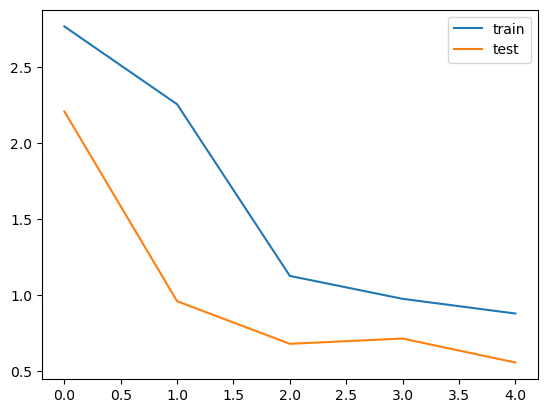

In [616]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label= 'test')
pyplot.legend()
pyplot.show()

In [617]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_idex = x_tokenizer.index_word
target_ord_index = y_tokenizer.word_index

In [618]:
#Inference Models 

#Encode the input sequence to get the feature vector 
encoder_model=Model(inputs=encoder_inputs, outputs=[encoder_outputs,
                                state_h,state_c])

#Decoder setup

#Below tensors will hold the states of the previous time step
decoder_state_input_h= Input(shape=(latent_dim, ))
decoder_state_input_c= Input(shape=(latent_dim, ))
decoder_hidden_state_input = Input(shape=(max_ConcatenatedResponse_len, latent_dim))

# Get the embeddings of the decoder sequence 
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence , set the initial states to the states from the previous time step
(decoder_outputs2,state_h2, state_c2) = decoder_lstm(dec_emb2,
        initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2= decoder_dense(decoder_outputs2)

# Final decoder model
decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,
                                         decoder_state_input_h, decoder_state_input_c],
                                          [decoder_outputs2]+[state_h2,state_c2]
)        


In [632]:
def decode_sequence(input_seq):
    (e_out, e_h, e_c) = encoder_model.predict(input_seq)

    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
        (output_tokens, h, c) = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index.get(sampled_token_index, '')

        if sampled_token != 'eostok':
            decoded_sentence += ' ' + sampled_token

        if sampled_token == 'eostok' or len(decoded_sentence.split()) >= max_الملخص_len - 1:
            stop_condition = True

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        (e_h, e_c) = (h, c)

    return decoded_sentence.strip()

        

In [634]:
# Seq2summary () and seq2text() which convert numeric- representation to string-representation of summary and text respectively 
# To convert sequence to summary
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i != target_word_index.get('sostok', 0) and i != target_word_index.get('eostok', 0):
            newString = newString + reverse_target_word_index.get(i, '') + ' '
    return newString.strip()

# To convert sequence to text
def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString = newString + reverse_source_word_index.get(i, '') + ' '
    return newString.strip()


In [ ]:
for i in range(0, 19):
    print('Review:', seq2text(X_summary_train[i]))
    print('Original summary:', seq2summary(y_summary_train[i]))
    print('Predicted summary:', decode_sequence(X_summary_train[i].reshape(1, max_ConcatenatedResponse_len)))
    print('\n')


Review: الذى عجبنى لذى عجبنى مقتراح حسينى هى
Original summary: يتم لحظ
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

In [ ]:
#Model Evaluation 

In [23]:
#Model Deployment& Production 


In [511]:
import joblib

In [517]:
joblib.dump(clf, 'Feedback.pkl')


['Feedback.pkl']